## eBay Kleinanzeigen Analysis ##

We're going to clean and analyze used car listings on Ebay


In [54]:
import pandas as pd
import numpy as np

autos = pd.read_csv("autos.csv", encoding="Latin-1")

In [55]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [56]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [57]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [58]:
# Let's re-format some of our data

print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [59]:
columns = ['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen']

In [60]:
columns_edited = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_of_pictures', 'postal_code',
       'last_seen']

In [61]:
autos.columns = columns_edited

In [62]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gear_box,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Cleanup results ## 

After cleaning the column names it's easier to interpret what each column means and will be easier to reference when we're making edits to the data later

In [63]:
autos.describe(include="all")

autos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled          50000 non-null object
name                  50000 non-null object
seller                50000 non-null object
offer_type            50000 non-null object
price                 50000 non-null object
abtest                50000 non-null object
vehicle_type          44905 non-null object
registration_year     50000 non-null int64
gear_box              47320 non-null object
power_ps              50000 non-null int64
model                 47242 non-null object
odometer              50000 non-null object
registration_month    50000 non-null int64
fuel_type             45518 non-null object
brand                 50000 non-null object
unrepaired_damage     40171 non-null object
ad_created            50000 non-null object
num_of_pictures       50000 non-null int64
postal_code           50000 non-null int64
last_seen             50000 non-null object
dtypes: int64(5)

## Columns to be removed ## 

We can remove the following columns as they have only a few unique values and don't add any value to our analysis:

Columns to remove:

* seller - this is mostly marked as private except for 1 value
* abcount - only two values here that don't add any value
* offertype = Not useful, mostly only one value
* num_of_pictures = Only values of 0

Columns to clean:

* odometer - Can be converted to numeric values
* price - Needs to be cleaned and converted to integers

Columns to investigate:

* month - How can a month be 0? Through 12? We'll likely have to drop this or look at "ad_created"



In [64]:
autos["price"] = (autos["price"].str.replace("$", "")
                  .str.replace(",", "")
                  .astype(int))


In [65]:
autos["odometer"] = (autos["odometer"].str.replace("km","")
                     .str.replace(",","")
                    .astype(int))

In [66]:
autos = autos.drop(["num_of_pictures", "seller", "offer_type"], axis=1)

In [67]:
autos.rename({"odometer": "odometer_km"}, axis = 1, inplace=True)

In [68]:
autos["odometer_km"].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

In [69]:
autos["price"].unique().shape

(2357,)

In [70]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [71]:
autos["price"].value_counts().head(10)


0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
Name: price, dtype: int64

In [72]:
autos["price"].value_counts(normalize=True)

0         0.02842
500       0.01562
1500      0.01468
2500      0.01286
1000      0.01278
1200      0.01278
600       0.01062
800       0.00996
3500      0.00996
2000      0.00920
999       0.00868
750       0.00866
900       0.00840
650       0.00838
850       0.00820
700       0.00790
4500      0.00788
300       0.00768
2200      0.00764
950       0.00758
1100      0.00752
1300      0.00742
3000      0.00730
550       0.00712
1800      0.00710
5500      0.00680
1250      0.00670
350       0.00670
1600      0.00654
1999      0.00644
           ...   
46200     0.00002
29600     0.00002
13480     0.00002
21700     0.00002
7373      0.00002
3279      0.00002
4286      0.00002
188       0.00002
17830     0.00002
9130      0.00002
910       0.00002
238       0.00002
2671      0.00002
69900     0.00002
151990    0.00002
2479      0.00002
4510      0.00002
86500     0.00002
47499     0.00002
16998     0.00002
27299     0.00002
41850     0.00002
4780      0.00002
686       0.00002
6495      

In [73]:
autos["price"].max()

99999999

{'boxes': [<matplotlib.lines.Line2D at 0x7f9abc404198>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9abc404fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9abc59d9b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9abc596c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9abc4048d0>,
  <matplotlib.lines.Line2D at 0x7f9abc404ef0>]}

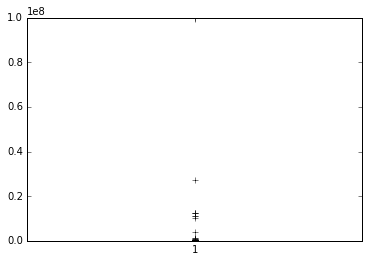

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(autos["price"])

## Removal Decisions ##

We're going to drop the following rows based on the above information: 

* Any rows where price = \$0 as this doesn't seem accurate or helpful in our analysis
* The one row that is away above the norm, which is the max price of \$99999999

Let's also note for our analysis that it appears odometer values are rounded, likely per a dropdown selection on the site

In [75]:
zero_check = autos["price"] != 0
autos_cleaned = autos[zero_check]

max_check = autos["price"] != 99999999
autos_cleaned = autos_cleaned[max_check]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [76]:
autos_cleaned.shape

(48578, 17)

## Date Values & Processing ## 

There are 5 types of date types in our dataframe:

* - `date_crawled`: added by the crawler
* - `last_seen`: added by the crawler
* - `ad_created`: from the website
* - `registration_month`: from the website
* - `registration_year`: from the website

In [77]:
dates = ["date_crawled", "last_seen", "ad_created", 
         "registration_month", "registration_year"]

autos[dates].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
date_crawled          50000 non-null object
last_seen             50000 non-null object
ad_created            50000 non-null object
registration_month    50000 non-null int64
registration_year     50000 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [78]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [79]:
autos["date_crawled_clean"] = autos['date_crawled'].str[:10]
autos["ad_created_clean"] = autos['ad_created'].str[:10]
autos["last_seen_clean"] = autos['last_seen'].str[:10]


In [80]:
autos["date_crawled_clean"].value_counts(normalize=True, dropna=False).sort_index()*100



2016-03-05    2.538
2016-03-06    1.394
2016-03-07    3.596
2016-03-08    3.330
2016-03-09    3.322
2016-03-10    3.212
2016-03-11    3.248
2016-03-12    3.678
2016-03-13    1.556
2016-03-14    3.662
2016-03-15    3.398
2016-03-16    2.950
2016-03-17    3.152
2016-03-18    1.306
2016-03-19    3.490
2016-03-20    3.782
2016-03-21    3.752
2016-03-22    3.294
2016-03-23    3.238
2016-03-24    2.910
2016-03-25    3.174
2016-03-26    3.248
2016-03-27    3.104
2016-03-28    3.484
2016-03-29    3.418
2016-03-30    3.362
2016-03-31    3.192
2016-04-01    3.380
2016-04-02    3.540
2016-04-03    3.868
2016-04-04    3.652
2016-04-05    1.310
2016-04-06    0.318
2016-04-07    0.142
Name: date_crawled_clean, dtype: float64

In [81]:
autos["ad_created_clean"].value_counts(normalize=True, dropna=False).sort_index()*100



2015-06-11    0.002
2015-08-10    0.002
2015-09-09    0.002
2015-11-10    0.002
2015-12-05    0.002
2015-12-30    0.002
2016-01-03    0.002
2016-01-07    0.002
2016-01-10    0.004
2016-01-13    0.002
2016-01-14    0.002
2016-01-16    0.002
2016-01-22    0.002
2016-01-27    0.006
2016-01-29    0.002
2016-02-01    0.002
2016-02-02    0.004
2016-02-05    0.004
2016-02-07    0.002
2016-02-08    0.002
2016-02-09    0.004
2016-02-11    0.002
2016-02-12    0.006
2016-02-14    0.004
2016-02-16    0.002
2016-02-17    0.002
2016-02-18    0.004
2016-02-19    0.006
2016-02-20    0.004
2016-02-21    0.006
              ...  
2016-03-09    3.324
2016-03-10    3.186
2016-03-11    3.278
2016-03-12    3.662
2016-03-13    1.692
2016-03-14    3.522
2016-03-15    3.374
2016-03-16    3.000
2016-03-17    3.120
2016-03-18    1.372
2016-03-19    3.384
2016-03-20    3.786
2016-03-21    3.772
2016-03-22    3.280
2016-03-23    3.218
2016-03-24    2.908
2016-03-25    3.188
2016-03-26    3.256
2016-03-27    3.090


In [82]:
autos["last_seen_clean"].value_counts(normalize=True, dropna=False).sort_index()*100



2016-03-05     0.108
2016-03-06     0.442
2016-03-07     0.536
2016-03-08     0.760
2016-03-09     0.986
2016-03-10     1.076
2016-03-11     1.252
2016-03-12     2.382
2016-03-13     0.898
2016-03-14     1.280
2016-03-15     1.588
2016-03-16     1.644
2016-03-17     2.792
2016-03-18     0.742
2016-03-19     1.574
2016-03-20     2.070
2016-03-21     2.074
2016-03-22     2.158
2016-03-23     1.858
2016-03-24     1.956
2016-03-25     1.920
2016-03-26     1.696
2016-03-27     1.602
2016-03-28     2.086
2016-03-29     2.234
2016-03-30     2.484
2016-03-31     2.384
2016-04-01     2.310
2016-04-02     2.490
2016-04-03     2.536
2016-04-04     2.462
2016-04-05    12.428
2016-04-06    22.100
2016-04-07    13.092
Name: last_seen_clean, dtype: float64

## Date observations ## 

It appears the the dates of the postings that were last seen and last crawled the most happen in April 2016. However the majority of ads were created on a much wider distribution, from multiple days ranging from June 2015 - April 2016.





In [83]:
autos_cleaned["registration_year"].describe()

count    48578.000000
mean      2004.753119
std         88.632571
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

## Registration Year Notes ##

It appears we have some bad data for registration year, with the minimum being 1000 (long before car registrations were a thing) and a maximum value of 9999, which makes no sense given our current year in the world.

Given the bad data, we're going to remove any used cars from before 1900 (right before the model T was invented) and above 2016, which is the year our data was scraped.


In [84]:
# This will mark all cars before 1900 as false

before_1900 = autos_cleaned["registration_year"] > 1900

# This will mark all cars after 2016 as false
after_2016 = autos_cleaned["registration_year"] < 2016

autos_cleaned = autos_cleaned[before_1900]
autos_cleaned = autos_cleaned[after_2016]

autos_cleaned.shape

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(45472, 17)

In [85]:
autos_cleaned["registration_year"].value_counts(normalize=True) * 100



2000    6.940535
2005    6.456721
1999    6.373153
2004    5.944317
2003    5.935521
2006    5.873944
2001    5.799173
2002    5.467101
1998    5.196605
2007    5.007477
2008    4.871129
2009    4.587438
1997    4.290552
2011    3.569229
2010    3.494458
1996    3.019441
2012    2.880894
1995    2.700563
2013    1.765922
2014    1.460239
1994    1.383269
1993    0.934641
2015    0.862069
1992    0.815887
1990    0.763107
1991    0.745514
1989    0.382653
1988    0.296886
1985    0.211119
1980    0.186928
          ...   
1966    0.048381
1976    0.046182
1969    0.041784
1975    0.039585
1965    0.037386
1964    0.026390
1963    0.017593
1959    0.013195
1961    0.013195
1910    0.010996
1956    0.008797
1958    0.008797
1937    0.008797
1962    0.008797
1950    0.006597
1941    0.004398
1955    0.004398
1951    0.004398
1934    0.004398
1957    0.004398
1954    0.004398
1953    0.002199
1948    0.002199
1929    0.002199
1943    0.002199
1939    0.002199
1938    0.002199
1931    0.0021

In [86]:
autos_cleaned["registration_year"].describe()


count    45472.000000
mean      2002.557002
std          6.954304
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2015.000000
Name: registration_year, dtype: float64

## Years After Cleanup ## 

Now we can see the model years is in much better shape, with the minimum being 1910 (which could be a classic car being sold) and the maximum is 2015, which makes sense. Note an additional few thousand rows got dropped with this cleaning

## Brand Analysis ##

For brands, we're going to look at all brands with >=1% share of the total cars in our data.



In [97]:
autos_cleaned["brand"].value_counts(normalize=True)[:17]


volkswagen       0.210525
bmw              0.111167
opel             0.106219
mercedes_benz    0.097313
audi             0.087219
ford             0.069735
renault          0.046556
peugeot          0.029601
fiat             0.025356
seat             0.018099
skoda            0.016626
nissan           0.015240
mazda            0.015130
smart            0.014141
citroen          0.014031
toyota           0.012755
hyundai          0.010072
Name: brand, dtype: float64

In [148]:
brands = ["volkswagen", "bmw", "opel", "mercedes_benz", "audi",
          "ford", "renault", "peugeot", "fiat", "seat", "skoda",
          "nissan", "mazda", "smart", "citroen", "toyota", "hyundai"]

brand_value = {}

for brand in brands:
    autos_cleaned_brand = autos_cleaned[autos_cleaned["brand"] == brand]
    brand_mean = autos_cleaned_brand["price"].mean()
    brand_value[brand] = int(brand_mean)
                               
print(brand_value)

{'mazda': 4190, 'renault': 2491, 'volkswagen': 6848, 'seat': 4423, 'smart': 3616, 'peugeot': 3130, 'fiat': 2861, 'hyundai': 5454, 'ford': 7634, 'bmw': 8641, 'nissan': 4821, 'opel': 5568, 'toyota': 5231, 'mercedes_benz': 8711, 'citroen': 46647, 'skoda': 6349, 'audi': 9349}


## Brand Analysis ## 

Of the 89% of the total "market share" brands from our analysis, here are the top 5 by price:

1. Citroen - \$46647
2. Audi - \$9349
3. Mercedes - \$8711
4. BMW - \$8641
5. Ford - \$7634

However, let's look at top 5 by "market share" based on our value counts above:

1. Volkswagen - \$6848
2. BMW - \$8641
3. Opel - \$5568
4. Mercedes - \$8711
5. Audi - \$9349

We can see higher-end used cars are more expensive, such as BMW, Audi and Mercedes, while more common cars like Volkswagen and Opel are less expensive, which makes sense, given we would expect a higher-end car to be more expensive.

In [149]:
brand_mileage = {}

for brand in brands:
    autos_cleaned_brand = autos_cleaned[autos_cleaned["brand"] == brand]
    mileage_mean = autos_cleaned_brand["odometer_km"].mean()
    brand_mileage[brand] = int(mileage_mean)
                               
print(brand_mileage)

{'mazda': 124004, 'renault': 127938, 'volkswagen': 128449, 'seat': 120972, 'smart': 98685, 'peugeot': 127113, 'fiat': 116647, 'hyundai': 105655, 'ford': 123978, 'bmw': 132465, 'nissan': 118369, 'opel': 129236, 'toyota': 115568, 'mercedes_benz': 130615, 'citroen': 119467, 'skoda': 111005, 'audi': 129189}


In [150]:
brand_value_df = pd.Series(brand_value)
brand_mileage_df = pd.Series(brand_mileage)
print(brand_value_df)
print(brand_mileage_df)

audi              9349
bmw               8641
citroen          46647
fiat              2861
ford              7634
hyundai           5454
mazda             4190
mercedes_benz     8711
nissan            4821
opel              5568
peugeot           3130
renault           2491
seat              4423
skoda             6349
smart             3616
toyota            5231
volkswagen        6848
dtype: int64
audi             129189
bmw              132465
citroen          119467
fiat             116647
ford             123978
hyundai          105655
mazda            124004
mercedes_benz    130615
nissan           118369
opel             129236
peugeot          127113
renault          127938
seat             120972
skoda            111005
smart             98685
toyota           115568
volkswagen       128449
dtype: int64


In [151]:
mean_price_df = pd.DataFrame(brand_value_df, columns=['average_price'])
mean_mileage_df = pd.DataFrame(brand_mileage_df, columns=['average_mileage'])


In [152]:
mean_price_df

,average_price
audi,9349
bmw,8641
citroen,46647
fiat,2861
ford,7634
hyundai,5454
mazda,4190
mercedes_benz,8711
nissan,4821
opel,5568


In [153]:
mean_mileage_df

,average_mileage
audi,129189
bmw,132465
citroen,119467
fiat,116647
ford,123978
hyundai,105655
mazda,124004
mercedes_benz,130615
nissan,118369
opel,129236


In [154]:
mean_mileage_df["average_price"] = mean_price_df["average_price"]

In [159]:
combined_df = mean_mileage_df

combined_df


,average_mileage,average_price
audi,129189,9349
bmw,132465,8641
citroen,119467,46647
fiat,116647,2861
ford,123978,7634
hyundai,105655,5454
mazda,124004,4190
mercedes_benz,130615,8711
nissan,118369,4821
opel,129236,5568


## Results ## 

The mileage does not vary as much as price does among the various brands, although some of the more expensive brands such as BMW, Merc